In [1]:
import numpy as np
import tensorflow as tf
import cv2
np.random.seed(42)

In [8]:
# Importing Image and Standardizing the same
SIZE=256

#Load the original image and resize the same with 256X256
#The image is a square image(Square Matrix)
img = tf.keras.preprocessing.image.load_img('Bill_Gates.jpg', target_size=(SIZE, SIZE))

#Converting the blob/image into a numpy array
img_data= tf.keras.preprocessing.image.img_to_array(img)

#Standardizing the intensities ---- 0 to 255
img_array = img_data.astype('float32') / 255.

myCompatibleImage = np.expand_dims(img_array, axis = 0)
myCompatibleImage.shape



(1, 256, 256, 3)

In [ ]:
# Hinton and Salakhutdinov (2006) ---> Autoencoder
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
#Dense Layer
#=========================================Dont Get Confused 
#Dense Layer
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='same'))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         5

In [ ]:
#To enable Eager Execution !!!
# By default tensorflow expects batch based approach which is a lazy approach
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model.fit(myCompatibleImage, myCompatibleImage, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4521 - accuracy: 0.1035
Epoch 2/5000
1/1 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.1016

C:\Users\Prashant\Anaconda3\envs\pnDlMinEnv2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1/1 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.1016
Epoch 3/5000
1/1 [==============================] - 0s 963us/step - loss: 0.4384 - accuracy: 0.1016
Epoch 4/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4290 - accuracy: 0.1016
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.1015
Epoch 6/5000
1/1 [==============================] - 0s 996us/step - loss: 0.4015 - accuracy: 0.1013
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.1010
Epoch 8/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3583 - accuracy: 0.1009
Epoch 9/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3311 - accuracy: 0.1009
Epoch 10/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3011 - accuracy: 0.1009
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.1009
Epoch 12/5000
1/1 [

1/1 [==============================] - 0s 996us/step - loss: 0.0117 - accuracy: 0.8745
Epoch 165/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0116 - accuracy: 0.8746
Epoch 166/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0116 - accuracy: 0.8746
Epoch 167/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0116 - accuracy: 0.8746
Epoch 168/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0115 - accuracy: 0.8746
Epoch 169/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0115 - accuracy: 0.8746
Epoch 170/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.8746
Epoch 171/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0115 - accuracy: 0.8746
Epoch 172/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0114 - accuracy: 0.8745
Epoch 173/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0114 - accuracy: 0.87

Epoch 325/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.8973
Epoch 326/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0068 - accuracy: 0.8971
Epoch 327/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0068 - accuracy: 0.8955
Epoch 328/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0068 - accuracy: 0.8980
Epoch 329/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.8962
Epoch 330/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0067 - accuracy: 0.8973
Epoch 331/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0067 - accuracy: 0.8972
Epoch 332/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.8969
Epoch 333/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0067 - accuracy: 0.8989
Epoch 334/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0067 - acc

1/1 [==============================] - 0s 965us/step - loss: 0.0057 - accuracy: 0.8897
Epoch 487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.8894
Epoch 488/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0058 - accuracy: 0.8990
Epoch 489/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.8850
Epoch 490/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.8950
Epoch 491/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.8972
Epoch 492/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0057 - accuracy: 0.8867
Epoch 493/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0057 - accuracy: 0.8984
Epoch 494/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.8952
Epoch 495/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.8914
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.8983
Epoch 648/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0053 - accuracy: 0.8896
Epoch 649/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0052 - accuracy: 0.8969
Epoch 650/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.8938
Epoch 651/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0052 - accuracy: 0.8923
Epoch 652/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.8973
Epoch 653/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0052 - accuracy: 0.8903
Epoch 654/5000
1/1 [==============================] - 0s 966us/step - loss: 0.0052 - accuracy: 0.8975
Epoch 655/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0052 - accuracy: 0.8928
Epoch 656/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0052 - accuracy: 0.8952
E

1/1 [==============================] - 0s 995us/step - loss: 0.0049 - accuracy: 0.8985
Epoch 808/5000
1/1 [==============================] - 0s 955us/step - loss: 0.0049 - accuracy: 0.8946
Epoch 809/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0049 - accuracy: 0.8978
Epoch 810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.8950
Epoch 811/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0049 - accuracy: 0.8974
Epoch 812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.8967
Epoch 813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.8971
Epoch 814/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0049 - accuracy: 0.8976
Epoch 815/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0049 - accuracy: 0.8958
Epoch 816/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0049 - accuracy: 0.8990
E

Epoch 968/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0047 - accuracy: 0.8938
Epoch 969/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0047 - accuracy: 0.8985
Epoch 970/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.8968
Epoch 971/5000
1/1 [==============================] - 0s 980us/step - loss: 0.0047 - accuracy: 0.8966
Epoch 972/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0047 - accuracy: 0.8997
Epoch 973/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.8928
Epoch 974/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9012
Epoch 975/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.8909
Epoch 976/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9009
Epoch 977/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0047 - accurac

1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.8966
Epoch 1129/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.8986
Epoch 1130/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0045 - accuracy: 0.8986
Epoch 1131/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.8964
Epoch 1132/5000
1/1 [==============================] - 0s 980us/step - loss: 0.0045 - accuracy: 0.9000
Epoch 1133/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0045 - accuracy: 0.8942
Epoch 1134/5000
1/1 [==============================] - 0s 966us/step - loss: 0.0045 - accuracy: 0.9014
Epoch 1135/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0045 - accuracy: 0.8949
Epoch 1136/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0045 - accuracy: 0.9005
Epoch 1137/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0

1/1 [==============================] - 0s 964us/step - loss: 0.0044 - accuracy: 0.8984
Epoch 1209/5000
1/1 [==============================] - 0s 974us/step - loss: 0.0044 - accuracy: 0.8985
Epoch 1210/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0044 - accuracy: 0.8970
Epoch 1211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9009
Epoch 1212/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0045 - accuracy: 0.8964
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9015
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.8947
Epoch 1215/5000
1/1 [==============================] - 0s 970us/step - loss: 0.0045 - accuracy: 0.9008
Epoch 1216/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0045 - accuracy: 0.8952
Epoch 1217/5000
1/1 [==============================] - 0s 958us/step - loss: 0.0045 - accuracy:

1/1 [==============================] - 0s 965us/step - loss: 0.0044 - accuracy: 0.9010
Epoch 1369/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0043 - accuracy: 0.8967
Epoch 1370/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0043 - accuracy: 0.8984
Epoch 1371/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.8996
Epoch 1372/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0043 - accuracy: 0.8963
Epoch 1373/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0044 - accuracy: 0.9015
Epoch 1374/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0044 - accuracy: 0.8951
Epoch 1375/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.9017
Epoch 1376/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.8953
Epoch 1377/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0

1/1 [==============================] - 0s 964us/step - loss: 0.0043 - accuracy: 0.9027
Epoch 1529/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0043 - accuracy: 0.8926
Epoch 1530/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0043 - accuracy: 0.9020
Epoch 1531/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0043 - accuracy: 0.8955
Epoch 1532/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0042 - accuracy: 0.9003
Epoch 1533/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0042 - accuracy: 0.8991
Epoch 1534/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0042 - accuracy: 0.8977
Epoch 1535/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0043 - accuracy: 0.9009
Epoch 1536/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0043 - accuracy: 0.8956
Epoch 1537/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0043 - acc

1/1 [==============================] - 0s 997us/step - loss: 0.0042 - accuracy: 0.8925
Epoch 1689/5000
1/1 [==============================] - 0s 983us/step - loss: 0.0042 - accuracy: 0.9016
Epoch 1690/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.8963
Epoch 1691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.8991
Epoch 1692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.8991
Epoch 1693/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0042 - accuracy: 0.8969
Epoch 1694/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0042 - accuracy: 0.9016
Epoch 1695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.8944
Epoch 1696/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0042 - accuracy: 0.9025
Epoch 1697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.8

1/1 [==============================] - 0s 971us/step - loss: 0.0041 - accuracy: 0.9014
Epoch 1769/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.8950
Epoch 1770/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9012
Epoch 1771/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.8948
Epoch 1772/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9012
Epoch 1773/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0041 - accuracy: 0.8966
Epoch 1774/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9010
Epoch 1775/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.8975
Epoch 1776/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0041 - accuracy: 0.8996
Epoch 1777/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0041 - accuracy: 0.898

1/1 [==============================] - 0s 996us/step - loss: 0.0041 - accuracy: 0.8927
Epoch 1929/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0041 - accuracy: 0.9024
Epoch 1930/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0041 - accuracy: 0.8960
Epoch 1931/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9010
Epoch 1932/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0040 - accuracy: 0.8981
Epoch 1933/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0040 - accuracy: 0.8993
Epoch 1934/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0040 - accuracy: 0.9011
Epoch 1935/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0040 - accuracy: 0.8984
Epoch 1936/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0041 - accuracy: 0.9020
Epoch 1937/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - accurac

1/1 [==============================] - 0s 997us/step - loss: 0.0040 - accuracy: 0.8952
Epoch 2009/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0040 - accuracy: 0.9021
Epoch 2010/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0040 - accuracy: 0.8967
Epoch 2011/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9018
Epoch 2012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.8988
Epoch 2013/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0040 - accuracy: 0.9005
Epoch 2014/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0040 - accuracy: 0.9005
Epoch 2015/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0040 - accuracy: 0.8995
Epoch 2016/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0040 - accuracy: 0.9016
Epoch 2017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy:

1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9014
Epoch 2169/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.9023
Epoch 2170/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.9011
Epoch 2171/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9026
Epoch 2172/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0039 - accuracy: 0.8988
Epoch 2173/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0040 - accuracy: 0.9036
Epoch 2174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.8971
Epoch 2175/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0040 - accuracy: 0.9043
Epoch 2176/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0040 - accuracy: 0.8961
Epoch 2177/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0

1/1 [==============================] - 0s 998us/step - loss: 0.0039 - accuracy: 0.8984
Epoch 2329/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.9051
Epoch 2330/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0039 - accuracy: 0.9001
Epoch 2331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9044
Epoch 2332/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0039 - accuracy: 0.9018
Epoch 2333/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9034
Epoch 2334/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9031
Epoch 2335/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0039 - accuracy: 0.9025
Epoch 2336/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9035
Epoch 2337/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9

1/1 [==============================] - 0s 976us/step - loss: 0.0038 - accuracy: 0.9057
Epoch 2489/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9033
Epoch 2490/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0038 - accuracy: 0.9032
Epoch 2491/5000
1/1 [==============================] - 0s 966us/step - loss: 0.0038 - accuracy: 0.9051
Epoch 2492/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9013
Epoch 2493/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0039 - accuracy: 0.9065
Epoch 2494/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.9008
Epoch 2495/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9067
Epoch 2496/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0039 - accuracy: 0.8987
Epoch 2497/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0039 - accuracy:

1/1 [==============================] - 0s 966us/step - loss: 0.0038 - accuracy: 0.9080
Epoch 2649/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0038 - accuracy: 0.9035
Epoch 2650/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9083
Epoch 2651/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9012
Epoch 2652/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9086
Epoch 2653/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9001
Epoch 2654/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9088
Epoch 2655/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 0.9005
Epoch 2656/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0038 - accuracy: 0.9085
Epoch 2657/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0038 - accuracy: 0.9

1/1 [==============================] - 0s 961us/step - loss: 0.0038 - accuracy: 0.9016
Epoch 2809/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0038 - accuracy: 0.9094
Epoch 2810/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0038 - accuracy: 0.9014
Epoch 2811/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0038 - accuracy: 0.9098
Epoch 2812/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0038 - accuracy: 0.9023
Epoch 2813/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0038 - accuracy: 0.9090
Epoch 2814/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0038 - accuracy: 0.9032
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9081
Epoch 2816/5000
1/1 [==============================] - 0s 976us/step - loss: 0.0038 - accuracy: 0.9051
Epoch 2817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accurac

1/1 [==============================] - 0s 999us/step - loss: 0.0038 - accuracy: 0.9087
Epoch 2889/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0038 - accuracy: 0.9038
Epoch 2890/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0038 - accuracy: 0.9097
Epoch 2891/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9026
Epoch 2892/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0038 - accuracy: 0.9097
Epoch 2893/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0038 - accuracy: 0.9028
Epoch 2894/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9093
Epoch 2895/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0038 - accuracy: 0.9045
Epoch 2896/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0037 - accuracy: 0.9082
Epoch 2897/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0037 - accurac

1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9050
Epoch 3049/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9087
Epoch 3050/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0037 - accuracy: 0.9063
Epoch 3051/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9081
Epoch 3052/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0037 - accuracy: 0.9078
Epoch 3053/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0037 - accuracy: 0.9068
Epoch 3054/5000
1/1 [==============================] - 0s 985us/step - loss: 0.0037 - accuracy: 0.9087
Epoch 3055/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0037 - accuracy: 0.9059
Epoch 3056/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0037 - accuracy: 0.9091
Epoch 3057/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0

1/1 [==============================] - 0s 998us/step - loss: 0.0038 - accuracy: 0.9111
Epoch 3209/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0038 - accuracy: 0.9032
Epoch 3210/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0037 - accuracy: 0.9108
Epoch 3211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9038
Epoch 3212/5000
1/1 [==============================] - 0s 994us/step - loss: 0.0037 - accuracy: 0.9100
Epoch 3213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9080
Epoch 3214/5000
1/1 [==============================] - 0s 994us/step - loss: 0.0037 - accuracy: 0.9086
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9091
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9059
Epoch 3217/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0037 - accuracy: 0

1/1 [==============================] - 0s 997us/step - loss: 0.0037 - accuracy: 0.9055
Epoch 3369/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9105
Epoch 3370/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9051
Epoch 3371/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0037 - accuracy: 0.9112
Epoch 3372/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9041
Epoch 3373/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0037 - accuracy: 0.9116
Epoch 3374/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0037 - accuracy: 0.9041
Epoch 3375/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9111
Epoch 3376/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9053
Epoch 3377/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.911

1/1 [==============================] - 0s 997us/step - loss: 0.0036 - accuracy: 0.9064
Epoch 3529/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9118
Epoch 3530/5000
1/1 [==============================] - 0s 995us/step - loss: 0.0037 - accuracy: 0.9050
Epoch 3531/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0037 - accuracy: 0.9121
Epoch 3532/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0037 - accuracy: 0.9046
Epoch 3533/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9122
Epoch 3534/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0037 - accuracy: 0.9044
Epoch 3535/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0037 - accuracy: 0.9119
Epoch 3536/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0037 - accuracy: 0.9058
Epoch 3537/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy:

1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9088
Epoch 3689/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9093
Epoch 3690/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9084
Epoch 3691/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9100
Epoch 3692/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0036 - accuracy: 0.9068
Epoch 3693/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0036 - accuracy: 0.9109
Epoch 3694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9064
Epoch 3695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9107
Epoch 3696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9062
Epoch 3697/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0036 - accuracy: 0.9

1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9103
Epoch 3849/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0035 - accuracy: 0.9047
Epoch 3850/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9109
Epoch 3851/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9053
Epoch 3852/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9109
Epoch 3853/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9065
Epoch 3854/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9102
Epoch 3855/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9073
Epoch 3856/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9101
Epoch 3857/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0035 - accuracy: 0.9

1/1 [==============================] - 0s 998us/step - loss: 0.0035 - accuracy: 0.9049
Epoch 4009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9108
Epoch 4010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9046
Epoch 4011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9111
Epoch 4012/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0035 - accuracy: 0.9058
Epoch 4013/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0035 - accuracy: 0.9118
Epoch 4014/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0035 - accuracy: 0.9069
Epoch 4015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9111
Epoch 4016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9079
Epoch 4017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.910

1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9067
Epoch 4169/5000
1/1 [==============================] - 0s 957us/step - loss: 0.0034 - accuracy: 0.9101
Epoch 4170/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0035 - accuracy: 0.9062
Epoch 4171/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0035 - accuracy: 0.9105
Epoch 4172/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9053
Epoch 4173/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9105
Epoch 4174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9061
Epoch 4175/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9105
Epoch 4176/5000
1/1 [==============================] - 0s 986us/step - loss: 0.0034 - accuracy: 0.9064
Epoch 4177/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0034 - accuracy: 0.9

1/1 [==============================] - 0s 998us/step - loss: 0.0034 - accuracy: 0.9078
Epoch 4329/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0034 - accuracy: 0.9106
Epoch 4330/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0034 - accuracy: 0.9062
Epoch 4331/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0034 - accuracy: 0.9109
Epoch 4332/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9052
Epoch 4333/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9111
Epoch 4334/5000
1/1 [==============================] - 0s 974us/step - loss: 0.0035 - accuracy: 0.9041
Epoch 4335/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9106
Epoch 4336/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.0034 - accuracy: 0.9054
Epoch 4337/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 

1/1 [==============================] - 0s 963us/step - loss: 0.0035 - accuracy: 0.9116
Epoch 4489/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0035 - accuracy: 0.9049
Epoch 4490/5000
1/1 [==============================] - 0s 960us/step - loss: 0.0034 - accuracy: 0.9119
Epoch 4491/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0034 - accuracy: 0.9090
Epoch 4492/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0034 - accuracy: 0.9104
Epoch 4493/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0034 - accuracy: 0.9108
Epoch 4494/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9091
Epoch 4495/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0034 - accuracy: 0.9108
Epoch 4496/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0034 - accuracy: 0.9069
Epoch 4497/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0034 - accur

1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9105
Epoch 4649/5000
1/1 [==============================] - 0s 966us/step - loss: 0.0033 - accuracy: 0.9094
Epoch 4650/5000
1/1 [==============================] - 0s 964us/step - loss: 0.0033 - accuracy: 0.9102
Epoch 4651/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9109
Epoch 4652/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0033 - accuracy: 0.9094
Epoch 4653/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0033 - accuracy: 0.9110
Epoch 4654/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0034 - accuracy: 0.9091
Epoch 4655/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9115
Epoch 4656/5000
1/1 [==============================] - 0s 974us/step - loss: 0.0034 - accuracy: 0.9079
Epoch 4657/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accurac

1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9106
Epoch 4809/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0033 - accuracy: 0.9087
Epoch 4810/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9112
Epoch 4811/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9082
Epoch 4812/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9114
Epoch 4813/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0034 - accuracy: 0.9073
Epoch 4814/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0034 - accuracy: 0.9120
Epoch 4815/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0034 - accuracy: 0.9066
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9121
Epoch 4817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy:

1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9089
Epoch 4969/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0033 - accuracy: 0.9115
Epoch 4970/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9097
Epoch 4971/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9112
Epoch 4972/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9106
Epoch 4973/5000
1/1 [==============================] - 0s 965us/step - loss: 0.0033 - accuracy: 0.9105
Epoch 4974/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0033 - accuracy: 0.9112
Epoch 4975/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 0.9097
Epoch 4976/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9114
Epoch 4977/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.909

In [ ]:
pred = model.predict(myCompatibleImage)

C:\Users\Prashant\Anaconda3\envs\pnDlMinEnv2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


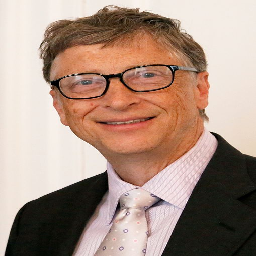

In [ ]:
#My Input
img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


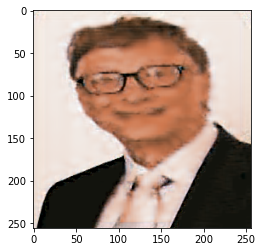

In [ ]:
#View Result
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

C:\Users\Prashant\Anaconda3\envs\pnDlMinEnv2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


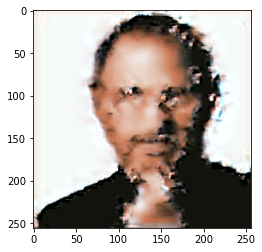

In [ ]:
img = tf.keras.preprocessing.image.load_img('Steve_Jobs.jpg', target_size=(SIZE, SIZE))
img_data= tf.keras.preprocessing.image.img_to_array(img)
img_array = img_data.astype('float32') / 255.
myCompatibleImage = np.expand_dims(img_array, axis = 0)
pred = model.predict(myCompatibleImage)
plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

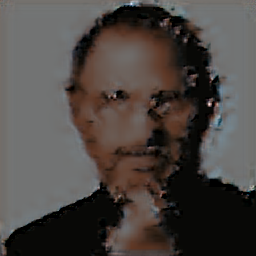

In [ ]:
tf.keras.preprocessing.image.array_to_img(pred[0].reshape(SIZE,SIZE,3))

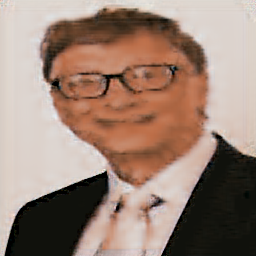

In [ ]:
tf.keras.preprocessing.image.array_to_img(pred[0].reshape(SIZE,SIZE,3))